# Hands-on I :  White Box Techniques ( ~ 30 minutes) 

Guideline:  
 
- Prerequisites: Data Preparation (Understand and load the data) 
- Decision Rules
    - Building decision rules
    - OneR 
    - ZeroR 
- Decision Trees 


### Preliminaries:  Understand the problem and load the data
This dataset contains information about survival passengers of titanic. The objective of the task is to classify if a passenger survives or not according to the features. 

The dataset is available in folder: data/titanic.xls

Attribute Information (in order):
    - pclass     Passenger class 
    - name       Name
    - sex        Sex 
    - age        Age
    - sibsp      Number of Siblings/Spouses Aboard
    - parch      Number of Parents/Children Aboard
    - ticket     Ticket Number
    - fare       Passenger Fare
    - cabin      Cabin 
    - embarked   Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
    - boat       Lifeboat (if survived)

Target Variable 
    - survided     The passenger survived or not 


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import pandas as pd
import numpy as np

def print_metrics(y_test: list, y_pred: list):
    """
    Args:
        y_test (list):  Ground truth (correct) labels.

        y_pred (list): Predicted labels, as returned by a classifier.
        
    """
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Recall  : {}".format(recall_score(y_test, y_pred)))
    print("F1-Score: {}".format(f1_score(y_test, y_pred)))


#Read Data from source 
data_df = pd.read_excel("Data/titanic_dataset.xls").set_index("name")

# Split the data into train and test set 
x_train, x_test, y_train, y_test = train_test_split(data_df.iloc[:, :-1], data_df["survived"], 
                                                    test_size=0.25, random_state=4242)

## Decision Rules
Decision rules are a set of IF-THEN rules. The combination of several rules can be used to make predictions. The rules can be defined manually by the user (if the user has good domain knowledge it can encode very good rules). 

An IF-THEN rule is an expression of the form: 
```
IF condition THEN conclusion

# Example: 
IF age=youth AND love_coffe=YES AND favourite_meetup="Python Barcelona"  
        THEN uses_python=YES
ELSE uses_python=NO

```
In this section is proposed to think and build your own decision rules set (just making some hypothesis about the dataset). Later in this section are explained two simple algorithms to learn rules from the dataset. 


### EXAMPLE
A) Analyze the dataset and encode an IF-ELSE block   
        
B) Build y_pred (an array with the binary probability class of the input samples). Use the test set
        1 if the passenger survived 
        0 if not survived 

C) Evaluate using print_metrics() funtion (using y_pred and y_test)

In [3]:
# Analyze the dataset and encode an IF-ELSE block 
x_train_dr = x_train.copy()

# IF EMBARKED = Q THEN survived = YES 
# ELSE survived = NO 

In [4]:
# Build y_pred using previous rule 
x_test_dr = x_test.copy()

x_test_dr["index"] = range(0, x_test_dr.shape[0]) 
x_test_dr = x_test_dr[x_test_dr["embarked"] == "Q"]

y_pred = np.zeros(y_test.shape[0])
np.put(y_pred, x_test_dr["index"].tolist(), np.ones(y_test.shape[0], dtype = int))


In [6]:
# Evaluate the rule
print_metrics(y_test, y_pred)

Accuracy: 0.5640243902439024
Recall  : 0.07751937984496124
F1-Score: 0.12269938650306748


### TODO
Follow the previous steps and encode your own rule 

A) Analyze the dataset and encode an IF-ELSE block   
        
B) Build y_pred (an array with the binary probability class of the input samples). Use the test set
        1 if the passenger survived 
        0 if not survived 

C) Evaluate using print_metrics() funtion (using y_pred and y_test)

## OneR Algorithm
OneR probably is one of the simplest methods for classification (for discrete attributes)  due to the simplicity we can quickly explain each prediction.  Although the simplicity of this algorithm it is only a few percentage points less accurate than decision trees (source: Very Simple Classification Rules Perform Well on Most Commonly Used Datasets [link](https://www.mlpack.org/papers/ds.pdf)) 

OneR works as follows: 

```
For feature in the dataset: 
     We build a Frequency table 
         - 1. Count how often each value of target appears in category groups
         - 2. Encode the frequency class into a rule
         - 3. Calculate the quality of the rule 

The best predictor is chosen as the one with the smallest error
```
Read more about OneR Algorithm at the following [link](https://www.saedsayad.com/oner.htm)

In [10]:
# 1. Count how often each value of target appears 
# 2. Find the most frequent class 
pd.concat([x_train, pd.Series(y_train, name="survived")], axis = 1) \
  .groupby(['embarked','survived']) \
  .size()

embarked  survived
C         0           100
          1           108
Q         0            55
          1            36
S         0           455
          1           227
dtype: int64

In [ ]:
# 3. Make the rule assigning that class to this value
# Using the previous frequency we can determine the following rules: 

```
IF embarked = C THEN survived = YES
IF embarked = Q THEN survived = NO
IF embarked = S THEN survived = NO
```

In [11]:
# Codify previous rules
rule_codification = {"C": 1, "Q": 0, "S": 0}
y_pred = x_test['embarked'].map(rule_codification)

# Evaluate the rule
metrics(y_test, y_pred)

Accuracy: 0.6737804878048781
Recall  : 0.32558139534883723
F1-Score: 0.4397905759162304


### TODO 

A) Build a Frequency table for sex feature 

B) Encode the Frequency table to a rule  

C) Compare the embarked predictor with sex predictor, better or worst? 

D) Implement ZeroR

In [12]:
# A:  Frequency table using sex feature 
pd.concat([x_train, pd.Series(y_train, name="survived")], axis = 1) \
  .groupby(['sex','survived']) \
  .size()

sex     survived
female  0            90
        1           252
male    0           520
        1           119
dtype: int64

In [13]:
# B: Calculate Accuracy on Test set 
# hint consider using map function
rule_codification = {"female": 1, "male": 0}
y_pred = x_test['sex'].map(rule_codification)

In [14]:
# C: Evaluate the rule  
print_metrics(y_test, y_pred)

Accuracy: 0.7591463414634146
Recall  : 0.6744186046511628
F1-Score: 0.6877470355731226


##### D) Implement ZeroR Algorithm 
ZeroR algorithm is even more simple. This algorithm is based on predicting the majority class, the classifier relies only on the target value and ignores the predictors. 
Example: imagine a dataset for email spam classification (is_spam) looking at the target value we found 57 cases of SPAM and 20 of NO SPAM. ZeroR builts the following rule: is_spam(X) = YES, in other words: for all predicted instances is returned YES. 
Of course, the limitations of ZeroR and OneR are obvious but these two algorithms can be used as a useful baseline for Machine Learning models. 

In [16]:
# Count occurences on train set (y_test) and determine mayority class (Survived or NOT). 
# Hint: Use unique function from numpy and zip 
target, occurences = np.unique(y_test, return_counts=True)
print("NOT Survided: 0, Survived: 1 -> {}".format(dict(zip(target, occurences))))

# Evaluate the rule using y_test
print_metrics(y_test, np.zeros(len(y_test)))

NOT Survided: 0, Survived: 1 -> {0: 199, 1: 129}
Accuracy: 0.6067073170731707
Recall  : 0.0
F1-Score: 0.0


## Decision Trees
Decision Trees is one of the top popular supervised Machine Learning methods, it builds a classifier or a regressor model in the form of a tree structure. 
This algorithm is simple to understand and interpret;  we can easily print the decision tree or determine the decision path of a prediction.  


<div>
    <center> <img src="Data/img/decision_tree.JPG" width="500" /> </center>
</div>

During this section is to show how to output graphical trees (using Graphviz, a Graph visualization Software). The last section includes a function to print the decision path of the decision tree. Decision_path is a function from DecisionTreeClassifier which returns a sparse matric showing which nodes of the tree the prediction goes through,  this information can be used to understand the why of a prediction. 

### TODO

A) Preprocess data. Detect Missing values and encode categorical features using OneHotEncoder. Use the function preprocessing_dataframe()

B) Train a decision tree model using x_train and x_test

C) Evaluate the model using print_metrics() funtion

D) Print the tree using graphviz 

E) Determine the decision path for an observation


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import numpy as np

def preprocessing_dataframe(data_df: object, missing_values_to_convert : list, categorical_to_encode: list) -> object: 
    """
    Args:
        dataset (Dataframe): Dataset 

        missing_values_to_convert (list): List of features names from dataset to impute missing values. Each missing value is 
            fill with mean
        
        categorical_to_encode (list): List of categorical features names to encode using OneHotEncoding
        
    Returns:
        DataFrame: converted dataset
    """
        
    # Handle Missing Values
    for feature in missing_values_to_convert: 
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        data_df[feature] = imputer.fit_transform(data_df[[feature]])

    # One Hot Encoding
    for feature in categorical_to_encode: 
        onehot_encoding = pd.get_dummies(data_df[feature],prefix=feature)
        data_df = pd.concat([data_df, pd.get_dummies(data_df[feature], prefix=feature)],axis=1)
        data_df.drop([feature],axis=1, inplace=True)

    return data_df

# Preprocessing, detect missing vaules and encode categorical features 
# use the function to preprocessing_dataframe() on x_train and x_test
x_train_dtree = preprocessing_dataframe(x_train.copy(), ["age", "fare"], ["sex", "embarked"])
x_test_dtree = preprocessing_dataframe(x_test.copy(), ["age", "fare"], ["sex", "embarked"])

In [13]:
# Train a Decision Tree model (use the implementation from scikit-learn library) 
dtree=DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(x_train_dtree , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [15]:
# Evaluate model using metrics funtion 
y_pred = dtree.predict(x_test_dtree)
print_metrics(y_test, y_pred)

Accuracy: 0.7987804878048781
Recall  : 0.7054263565891473
F1-Score: 0.7338709677419355


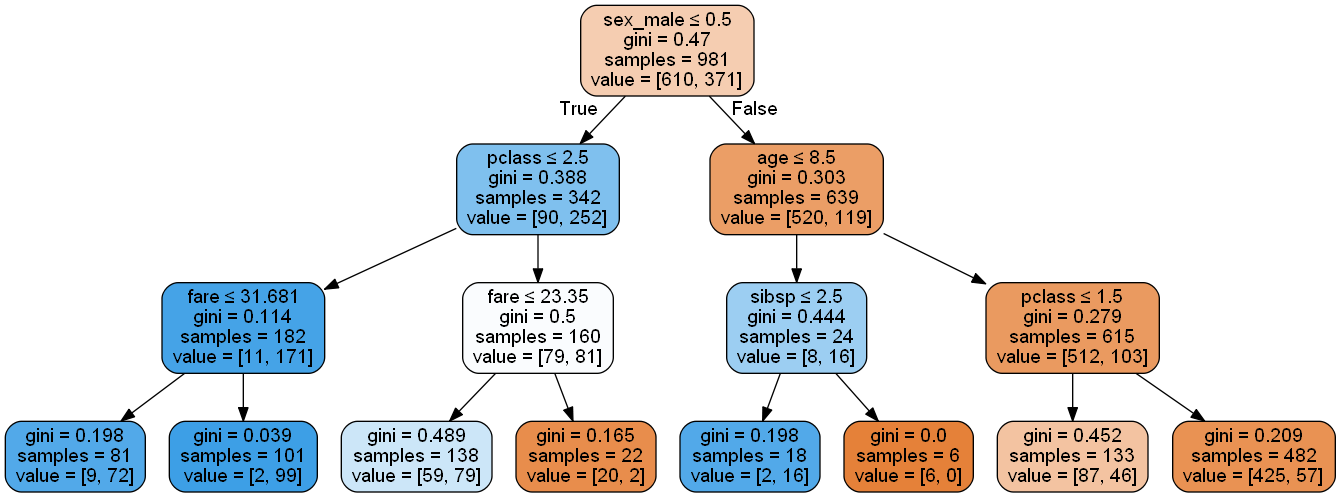

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def visualize_tree(model: object, feature_names: list) -> object:
    """
    Args:
        model (object): Decision Tree model  

        feature (list): List of features names 
        
    Returns:
        Image: graphical decision tree image
    """

    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data, feature_names = feature_names,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

# Use the function visualize_tree to print the tree structure
# Control de complexity of the three using max_depth
visualize_tree(dtree,  x_train_dtree.columns.values)


In [19]:
def print_decision_path(dtree: object, dataset: object, sample_id: int): 
    """
    Info: Adapted from https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html 
    
    Args:
        model (object): Decision Tree model  

        dataset (DataFrame): Dataset
        
        sample_id (int) : row identifier 
        
    """
    
    node_indicator = dtree.decision_path(dataset)
    feature = dtree.tree_.feature
    feature_names = x_test_dtree.columns.values
    leave_id = dtree.apply(dataset)

    node_index = node_indicator.indices[node_indicator.indptr[sample_id]: node_indicator.indptr[sample_id + 1]]
    threshold = dtree.tree_.threshold
    print("Decision Path for sample : {} (predicted as {}) \n".format(sample_id, dtree.predict([x_test_dtree.iloc[sample_id]])[0]))
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue
            
        if x_test_dtree.iloc[sample_id, feature[node_id]] <= threshold[node_id]:
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("decision id node {} : {} (= {}) {} {})".format(node_id, feature_names[feature[node_id]], 
                                                              x_test_dtree.iloc[sample_id, feature[node_id]], threshold_sign, threshold[node_id]))

        
# Use the function print_decision_path to obtain the decision path for an instance (sample_id) in x_test (dataset)
print_decision_path(dtree, x_test_dtree, 14)

Decision Path for sample : 14 (predicted as 0) 

decision id node 0 : sex_male (= 1) > 0.5)
decision id node 8 : age (= 3.0) <= 8.5)
decision id node 9 : sibsp (= 4) > 2.5)
